In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import ZScaleInterval, LinearStretch, ImageNormalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
stack1 = fits.getdata("stack.W0204-0506.R_SPECIAL.60207.fits")
stack2 = fits.getdata("stack.W0204-0506.R_SPECIAL.60209.fits")
pol_frac1 = fits.getdata("masked_pol.W0204-0506.R_SPECIAL.60207.fits")
pol_frac2 = fits.getdata("masked_pol.W0204-0506.R_SPECIAL.60209.fits")
pol_ang1  = fits.getdata("masked_pol_angle.W0204-0506.R_SPECIAL.60207.fits")
pol_ang2  = fits.getdata("masked_pol_angle.W0204-0506.R_SPECIAL.60209.fits")

50 70 50 30


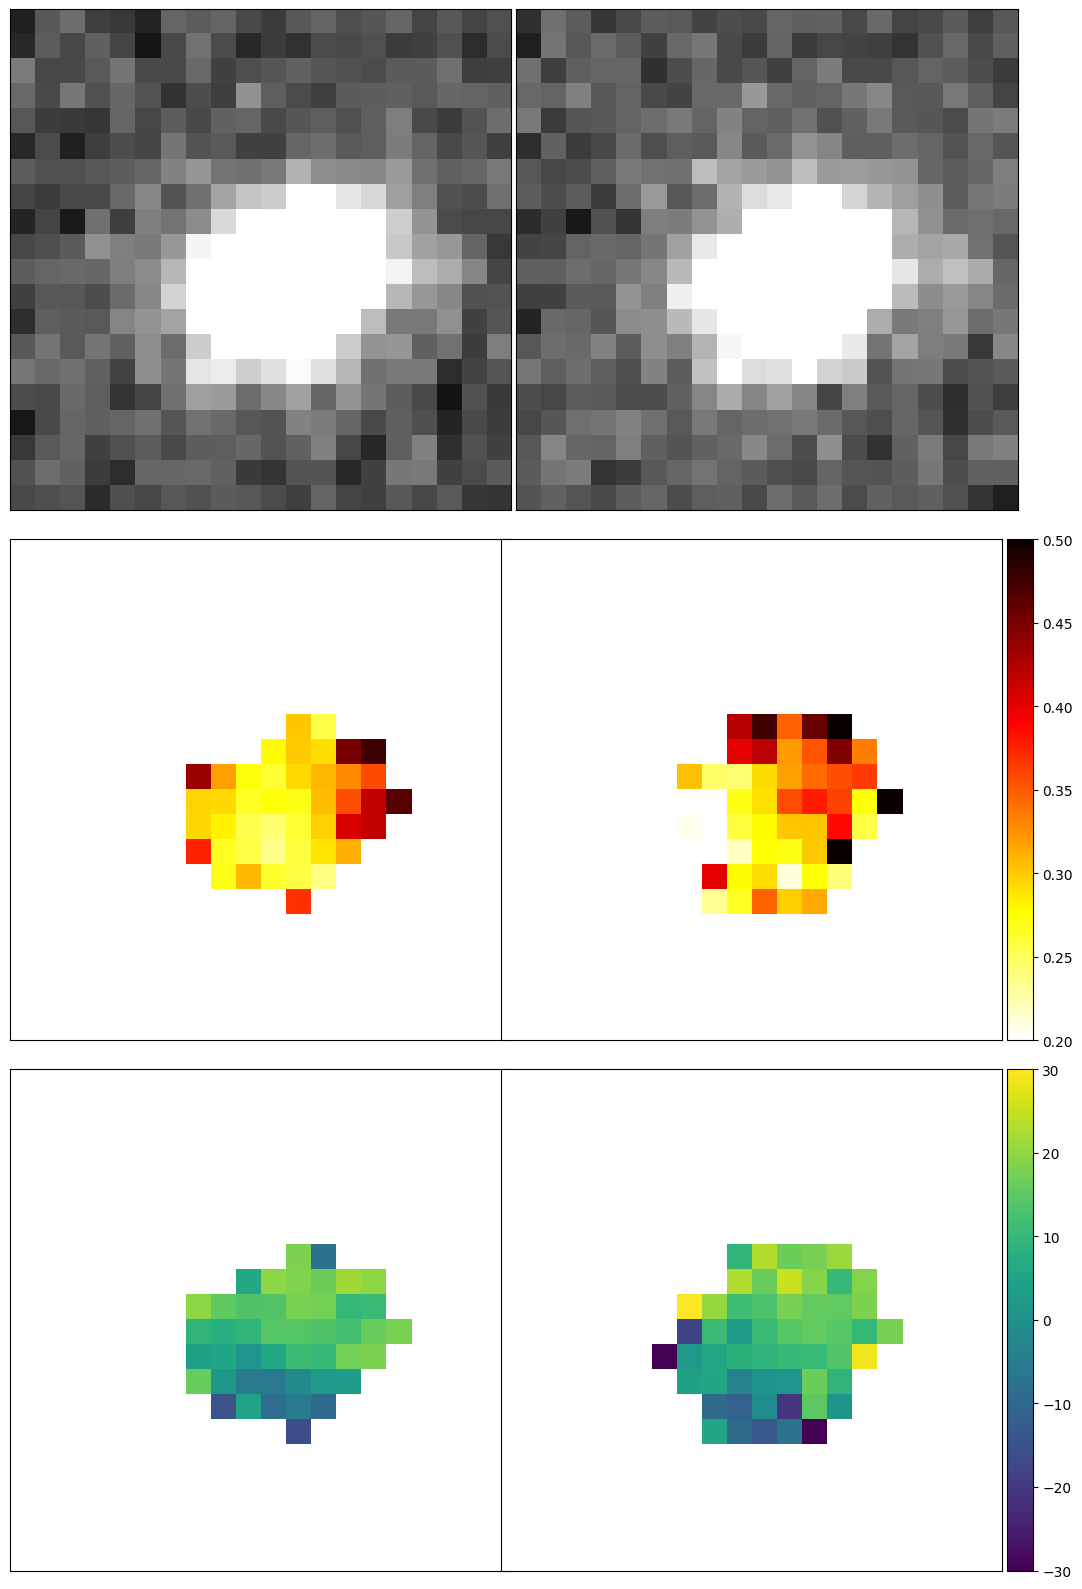

In [83]:
fig, axs = plt.subplots(3,2,figsize=(11,16), sharex=True, sharey=True)
#plt.subplots_adjust(hspace=0., wspace=0.)
plt.subplots_adjust(wspace=0.)
for ax in axs.flat:
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_xticks([])

size = 20
ix1 = int(stack1.shape[1]/2 - size/2)
ix2 = int(stack1.shape[1]/2 + size/2)
iy1 = int(stack1.shape[0]/2 + size/2)
iy2 = int(stack1.shape[0]/2 - size/2)
print(ix1, ix2, iy1, iy2)

norm1 = ImageNormalize(stack1, stretch=LinearStretch(), interval=ZScaleInterval())
axs[0,0].imshow(stack1[iy1:iy2:-1,ix1:ix2], norm=norm1, cmap='gray')

norm2 = ImageNormalize(stack2, stretch=LinearStretch(), interval=ZScaleInterval())
axs[0,1].imshow(stack2[iy1:iy2:-1,ix1:ix2], norm=norm2, cmap='gray')

axs[1,0].imshow(pol_frac1[iy1:iy2:-1,ix1:ix2], cmap='hot_r', vmin=0.2, vmax=0.5)
cm_pf = axs[1,1].imshow(pol_frac2[iy1:iy2:-1,ix1:ix2], cmap='hot_r', vmin=0.2, vmax=0.5)
divider_pf = make_axes_locatable(axs[1,1])
cax_pf = divider_pf.append_axes("right", size="5%", pad=0.05)
fig.colorbar(cm_pf, cax=cax_pf)

axs[2,0].imshow(pol_ang1[iy1:iy2:-1,ix1:ix2], cmap='viridis', vmin=-30, vmax=30)
cm_pa = axs[2,1].imshow(pol_ang2[iy1:iy2:-1,ix1:ix2], cmap='viridis', vmin=-30, vmax=30)
divider_pa = make_axes_locatable(axs[2,1])
cax_pa = divider_pa.append_axes("right", size="5%", pad=0.05)
fig.colorbar(cm_pa, cax=cax_pa)

fig.tight_layout()
plt.show()